# Figures 7

Generate figures matching theory and simulation for trainable length of deep dropout networks.

## Setup

In [18]:
from __future__ import print_function
import os, sys
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['image.cmap'] = 'viridis'


sys.path.insert(0, '../')

# Output figure directory
figure_dir = "../writeup/figures"
results_dir = "../results"
if not os.path.exists(figure_dir):
    raise ValueError("Figure directory does not exist. Create it or change figure_dir above.")
if not os.path.exists(results_dir):
    raise ValueError("Results directory does not exist. Create it or change results_dir above.")

## compute $\chi_1$ and $\chi_2$ for dropout network with $\rho=1$ (no dropout)

In [5]:
from network.theory import q_fixed_point,compute_chi1,c_fixed_point,compute_chi2
len_Sig = 31
weight_sigmas2 = np.linspace(1.0, 4.0, len_Sig)
qstars = np.zeros((len_Sig))
cstars = np.zeros((len_Sig))
chi1= np.zeros((len_Sig))
chi2= np.zeros((len_Sig))
for widx, weight_sigma2 in enumerate(tqdm(weight_sigmas2)):
    t,qstars[widx]  =  q_fixed_point(weight_sigma2**0.5, 0.05**0.5, 'tanh', 1.0)
    chi1[widx] = compute_chi1(qstars[widx], weight_sigma2**0.5, 0.05**0.5, 1.0, 'd_tanh')

for widx, weight_sigma2 in enumerate(tqdm(weight_sigmas2)):
    cstars[widx]  =  c_fixed_point(qstars[widx],weight_sigma2**0.5, 0.05**0.5, 'tanh', q12 = qstars[widx]*0.5)
    chi2[widx] = compute_chi2(qstars[widx], cstars[widx], weight_sigma2**0.5, 0.05**0.5, 1.0, 'd_tanh')
  

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [06:56<00:00,  7.98s/it]


## trainable length of deep dropout networks with $\rho=1$ (no dropout) 

In [14]:
import csv
import numpy as np

len_Len = 25
qstars = np.zeros((len_Sig))
cstars = np.zeros((len_Sig))

Length = np.linspace(10,  len_Len*10, len_Len )
Length_cif = np.linspace(10,  len_Len*10, len_Len )
Length_gau_s2_l1 = np.linspace(10,  len_Len*10, len_Len )
Length_gau_s1_RMP = np.linspace(10,  len_Len*10, len_Len )


heatmap = np.zeros((len_Len,len_Sig ))
heatmap_cif = np.zeros((len_Len,len_Sig ))
heatmap_gau_s2_l1 = np.zeros((len_Len,len_Sig ))
heatmap_gau_s2_cif = np.zeros((len_Len,len_Sig ))
heatmap_gau_s1_RMP = np.zeros((len_Len,len_Sig ))

for i in range(len_Len ):
    j = 0
    with open('../data/heatmap/heatmap/tanh2_orth_L%s0.csv' %str(i+1) , newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=' ')
            for row in spamreader:
                heatmap[i,j] = row[1]
                j = j + 1
                
for i in range(len_Len):
    j = 0
    with open('../data/heatmap/heatmap_cifar/tanh2_orth_L%s0.csv' %str(i+1) , newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=' ')
            for row in spamreader:
                j = j + 1  
                if ( j % 3000 == 0):
                    heatmap_cif[i,int(j/3000)-1] = row[1]
                    
                    
for i in range(len_Len):
    j = 0
    with open('../data/heatmap/heatmap_s2_gau_ci/tanh2_orth_L%s0.csv' %str(i+1) , newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=' ')
            for row in spamreader:
                j = j + 1  
                if ( j % 2000 == 0):
                    heatmap_gau_s2_cif[i,int(j/2000)-1] = row[1]                    
                                      
for i in range(len_Len ):
    j = 0
    with open('../data/heatmap/heatmap_s2_gau_l1/tanh2_gau_L%s0.csv' %str(i+1) , newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=' ')
            for row in spamreader:
                heatmap_gau_s2_l1[i,j] = row[1]
                j = j + 1              

for i in range(len_Len ):
    j = 0
    with open('../data/heatmap/heatmap_s1_gau_RMP/tanh2_orth_L%s0.csv' %str(i+1) , newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=' ')
            for row in spamreader:
                heatmap_gau_s1_RMP[i,j] = row[1]
                j = j + 1                                           

## compute $\chi_1$ and $\chi_2$ for dropout network with $\rho=0.99$

In [9]:
from network.theory import q_fixed_point,compute_chi1,c_fixed_point, compute_chi2
qstars_r99 = np.zeros((len_Sig))
cstars_r99 = np.zeros((len_Sig))
chi1_r99   = np.zeros((len_Sig))
chi2_r99   = np.zeros((len_Sig))

for widx, weight_sigma2 in enumerate(tqdm(weight_sigmas2)):
    t,qstars_r99[widx]  =  q_fixed_point(weight_sigma2**0.5, 0.05**0.5, 'tanh', 0.99)
    chi1_r99[widx] = compute_chi1(qstars_r99[widx], weight_sigma2**0.5, 0.05**0.5, 0.99, 'd_tanh')

for widx, weight_sigma2 in enumerate(tqdm(weight_sigmas2)):
    cstars_r99[widx]  =  c_fixed_point(qstars_r99[widx],weight_sigma2**0.5, 0.05**0.5, 'tanh', q12 = qstars_r99[widx]*0.5)
    chi2_r99[widx] = compute_chi2(qstars_r99[widx], cstars_r99[widx], weight_sigma2**0.5, 0.05**0.5, 0.99, 'd_tanh')

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [05:00<00:00,  8.55s/it]


## trainable length of deep dropout networks with $\rho=0.99$ 

In [15]:
Length_r99 = np.linspace(10,  len_Len*10, len_Len )
heatmap_r99_s3 = np.zeros((len_Len,len_Sig ))
    

for i in range(len_Len):
    j = 0
    with open('../data/heatmap/heatmap_r99_s3/tanh2_orth_r99_L%s0.csv' %str(i+1) , newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=' ')
            for row in spamreader:
                heatmap_r99_s3[i,j] = row[1]
                j = j + 1                             

## compute $\chi_1$ and $\chi_2$ for dropout network with $\rho=0.98$

In [12]:
from network.theory import q_fixed_point,compute_chi1,c_fixed_point, compute_chi2
qstars_r98 = np.zeros((len_Sig))
cstars_r98 = np.zeros((len_Sig))
chi1_r98   = np.zeros((len_Sig))
chi2_r98   = np.zeros((len_Sig))

for widx, weight_sigma2 in enumerate(tqdm(weight_sigmas2)):
    t,qstars_r98[widx]  =  q_fixed_point(weight_sigma2**0.5, 0.05**0.5, 'tanh', 0.98)
    chi1_r98[widx] = compute_chi1(qstars_r98[widx], weight_sigma2**0.5, 0.05**0.5, 0.98, 'd_tanh')

for widx, weight_sigma2 in enumerate(tqdm(weight_sigmas2)):
    cstars_r98[widx]  =  c_fixed_point(qstars_r98[widx],weight_sigma2**0.5, 0.05**0.5, 'tanh', q12 = qstars_r98[widx]*0.5)
    chi2_r98[widx] = compute_chi2(qstars_r98[widx], cstars_r98[widx], weight_sigma2**0.5, 0.05**0.5, 0.98, 'd_tanh')

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [04:39<00:00,  8.05s/it]


## trainable length of deep dropout networks with $\rho=0.98$ 

In [16]:
Length_r98 = np.linspace(10,  len_Len*10, len_Len)
heatmap_r98_s3 = np.zeros((len_Len,len_Sig ))
for i in range(len_Len):
    j = 0
    with open('../data/heatmap/heatmap_r98_s3_l2/tanh2_orth_r98_L%s0.csv' %str(i+1) , newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=' ')
            for row in spamreader:
                heatmap_r98_s3[i,j] = row[1]
                j = j + 1


heatmap_r98_s10 = np.zeros((len_Len,len_Sig ))
for i in range(len_Len):
    j = 0
    with open('../data/heatmap/heatmap_r98_s10_Gau/tanh2_orth_r98_L%s0.csv' %str(i+1) , newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=' ')
            for row in spamreader:
                heatmap_r98_s10[i,j] = row[1]
                j = j + 1


## compute $\chi_1$ and $\chi_2$ for dropout network with $\rho=0.95$

In [17]:
from network.theory import q_fixed_point,compute_chi1,c_fixed_point, compute_chi2
qstars_r95 = np.zeros((len_Sig))
cstars_r95 = np.zeros((len_Sig))
chi1_r95   = np.zeros((len_Sig))
chi2_r95   = np.zeros((len_Sig))

for widx, weight_sigma2 in enumerate(tqdm(weight_sigmas2)):
    t,qstars_r95[widx]  =  q_fixed_point(weight_sigma2**0.5, 0.05**0.5, 'tanh', 0.95)
    chi1_r95[widx] = compute_chi1(qstars_r95[widx], weight_sigma2**0.5, 0.05**0.5, 0.95, 'd_tanh')

for widx, weight_sigma2 in enumerate(tqdm(weight_sigmas2)):
    cstars_r95[widx]  =  c_fixed_point(qstars_r95[widx],weight_sigma2**0.5, 0.05**0.5, 'tanh', q12 = qstars_r95[widx]*0.5)
    chi2_r95[widx] = compute_chi2(qstars_r95[widx], cstars_r95[widx], weight_sigma2**0.5, 0.05**0.5, 0.95, 'd_tanh')

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [03:25<00:00,  6.54s/it]


## trainable length of deep dropout networks with $\rho=0.95$ 

In [19]:
heatmap_r95 = np.zeros((len_Len,len_Sig ))
for i in range(len_Len):
    j = 0
    with open('../data/heatmap/heatmap_r95_RMP/tanh2_orth_L%s0.csv' %str(i+1) , newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=' ')
            for row in spamreader:
                heatmap_r95[i,j] = row[1]
                j = j + 1


# Figure 7:  The training accuracy for neural networks as a function of the depth $L$ and initial weight variance $\sigma^2_w$ from a high accuracy (bright yellow) to low accuracy (black)
Comparison is made by plotting $12\xi_1$ (white solid line), $6\xi_2$ (green dashed line), and $12\xi_2$ (white dashed line). (a) 2000 training steps of $\rho=1$ network with Gaussian weights on the MNIST using SGD. (b) 1000 training steps of $\rho=1$ network with Gaussian weights on the MNIST using RMSProp. (c) 2000 training steps of $\rho=1$ network with Orthogonal weights on the MNIST. (d) 3000 training steps of $\rho=1$ network with Orthogonal weights on CIFAR10. (e) 3000 training steps of $\rho=0.99$ network with Orthogonal weights on the MNIST.  (f) 3000 training steps of $\rho=0.98$ network with Orthogonal weights on the MNIST using SGD. (g) 10000 training steps of $\rho=0.98$ network with Gaussian weights on the MNIST. (h) 3000 training steps of $\rho=0.95$ network with Orthogonal weights on the MNIST using SGD.

NameError: name 'sigma_pcolor' is not defined

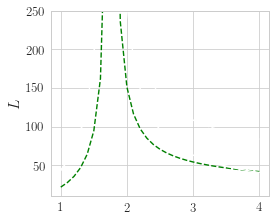

In [20]:
plt.figure(figsize=(18, 7.5))
gs = plt.GridSpec(2, 4)
plt.matplotlib.rc('xtick', labelsize=13) 
plt.matplotlib.rc('ytick', labelsize=13)

a1 = plt.subplot(gs[0, 0])

plt.plot(weight_sigmas2, 6.0/np.abs(np.log(chi2)),'green',ls='--',label=r'$6 \xi_2$')
plt.plot(weight_sigmas2, 12.0/np.abs(np.log(chi2)),'white',ls='--',label=r'$12 \xi_2$')
plt.plot(weight_sigmas2, 12.0/np.abs(np.log(chi1)),'white',ls='-',label=r'$12 \xi_1$')
plt.ylim(10, 250); plt.ylabel('$L$', fontsize=16)
sigma_pcolor(heatmap_gau_s2_l1, Length_gau_s2_l1,weight_sigmas2)  
plt.annotate('(a)', xy=(3.3, 200), xytext=(3.5, 225),color='white',fontsize=15)
l = plt.legend(loc=(0.5,0.5),fontsize=15)
for text in l.get_texts():
    text.set_color("white")


a2 = plt.subplot(gs[0, 1])

plt.plot(weight_sigmas2, 6.0/np.abs(np.log(chi2)),'green',ls='--',label=r'$6 \xi_2$')   
plt.plot(weight_sigmas2, 12.0/np.abs(np.log(chi2)),'white',ls='--',label=r'$12 \xi_2$')
plt.plot(weight_sigmas2, 12.0/np.abs(np.log(chi1)),'white',label=r'$12 \xi_1$')
plt.ylim(10, 250)
sigma_pcolor(heatmap_gau_s1_RMP,Length_gau_s1_RMP,weight_sigmas2)  
plt.annotate('(b)', xy=(3.3, 200), xytext=(3.5, 225),color='white',fontsize=15)
l = plt.legend(loc=(0.5,0.5),fontsize=15)
for text in l.get_texts():
    text.set_color("white")


a3 = plt.subplot(gs[0, 2])

plt.plot(weight_sigmas2, 6.0/np.abs(np.log(chi2)),'green',ls='--',label=r'$6 \xi_2$')
plt.plot(weight_sigmas2, 12.0/np.abs(np.log(chi2)),'white',ls='--',label=r'$12 \xi_2$')
plt.plot(weight_sigmas2, 12.0/np.abs(np.log(chi1)),'white',label=r'$12 \xi_1$')
plt.ylim(10, 250); plt.xlim(1,4); 
sigma_pcolor(heatmap, Length,weight_sigmas2)   
plt.annotate('(c)', xy=(3.3, 200), xytext=(3.5, 225),color='white',fontsize=15)
l = plt.legend(loc=(0.5,0.5),fontsize=15)
for text in l.get_texts():
    text.set_color("white")
    

a4 = plt.subplot(gs[0,3])
plt.plot(weight_sigmas2, 6.0/np.abs(np.log(chi2)),'green',ls='--',label=r'$6 \xi_2$')
plt.plot(weight_sigmas2, 12.0/np.abs(np.log(chi2)),'white',ls='--',label=r'$12 \xi_2$')
plt.plot(weight_sigmas2, 12.0/np.abs(np.log(chi1)),'white',label=r'$12 \xi_1$')
plt.ylim(10, 250); 
sigma_pcolor(heatmap_cif, Length_cif,weight_sigmas2)  
plt.annotate('(d)', xy=(3.3, 200), xytext=(3.5, 225),color='white',fontsize=15)
l = plt.legend(loc=(0.5,0.5),fontsize=15)
for text in l.get_texts():
    text.set_color("white")    
    
a5 = plt.subplot(gs[1, 0])
plt.plot(weight_sigmas2, 6.0/np.abs(np.log(chi2_r99)),'green',ls='--',label=r'$6 \xi_2$')
plt.plot(weight_sigmas2, 12.0/np.abs(np.log(chi2_r99)),'white',ls='--',label=r'$12 \xi_2$')
plt.plot(weight_sigmas2, 12.0/np.abs(np.log(chi1_r99)),'white',label=r'$12 \xi_1$')
plt.ylim(10, 250); plt.xlim(1,4); plt.xlabel('$\sigma^2_w$', fontsize=16); plt.ylabel('$L$', fontsize=16)
sigma_pcolor(heatmap_r99_s3, Length_r99,weight_sigmas2)    
plt.annotate('(e)', xy=(3.3, 200), xytext=(3.5, 225),color='white',fontsize=15)
l = plt.legend(loc=(0.5,0.5),fontsize=15)
for text in l.get_texts():
    text.set_color("white")
plt.xlabel('$\sigma^2_w$', fontsize=16); # ylabel('$L$', fontsize=16)


a6 = plt.subplot(gs[1, 1])

sigma_pcolor(heatmap_r98_s3, Length,weight_sigmas2)  
plt.plot(weight_sigmas2, 6.0/np.abs(np.log(chi2_r98)),'green',ls='--',label=r'$6 \xi_2$')
plt.plot(weight_sigmas2, 12.0/np.abs(np.log(chi2_r98)),ls='--',label=r'$12 \xi_2$',color='white')
plt.plot(weight_sigmas2, 12.0/np.abs(np.log(chi1_r98)),label=r'$12 \xi_1$',color='white')

plt.ylim(10, 250); plt.xlabel('$\sigma^2_w$', fontsize=16);
plt.annotate('(f)', xy=(3.3, 200), xytext=(3.5, 225),color='white',fontsize=15)
l = plt.legend(loc=(0.5,0.5),fontsize=15)
for text in l.get_texts():
    text.set_color("white")


a7 = plt.subplot(gs[1, 2])
sigma_pcolor(heatmap_r98_s10, Length_r98,weight_sigmas2)   
plt.plot(weight_sigmas2, 6.0/np.abs(np.log(chi2_r98)),'green',ls='--',label=r'$6 \xi_2$')
plt.plot(weight_sigmas2, 12.0/np.abs(np.log(chi2_r98)),'white',ls='--',label=r'$12 \xi_2$',color='white')
plt.plot(weight_sigmas2, 12.0/np.abs(np.log(chi1_r98)),'white',label=r'$12 \xi_1$',color='white')
plt.ylim(10, 250); plt.xlabel('$\sigma^2_w$', fontsize=16)
plt.annotate('(g)', xy=(3.3, 200), xytext=(3.5, 225),color='white',fontsize=15)
l = plt.legend(loc=(0.5,0.5),fontsize=15)
plt.xlabel('$\sigma^2_w$', fontsize=16);
for text in l.get_texts():
    text.set_color("white")
    
a8 = plt.subplot(gs[1, 3])
sigma_pcolor(heatmap_r95, Length,weight_sigmas2)    
plt.plot(weight_sigmas2, 6.0/np.abs(np.log(chi2_r95)),'green',ls='--',label=r'$6 \xi_2$')
plt.plot(weight_sigmas2, 12.0/np.abs(np.log(chi2_r95)),'white',ls='--',label=r'$12 \xi_2$',color='white')
plt.plot(weight_sigmas2, 12.0/np.abs(np.log(chi1_r95)),'white',label=r'$12 \xi_1$',color='white')
plt.ylim(10, 250); plt.xlabel('$\sigma^2_w$', fontsize=16);
plt.annotate('(h)', xy=(3.3, 200), xytext=(3.5, 225),color='white',fontsize=15)
l = plt.legend(loc=(0.5,0.5),fontsize=15)
for text in l.get_texts():
    text.set_color("white")    
    

#plt.savefig(os.path.join(figure_dir, "fig6_heatmap.pdf" ), bbox_inches='tight')